In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib
warnings.filterwarnings('ignore')

In [2]:
nfl_df = pd.read_csv('../data/nfl_elo.csv')

# Question 1
How does Brady's average Elo Rating compare to  other all  time greats?

## Process 
1. Use data time index
2. Isolate 6 quarterbacks and columns of interest: qb1 and qb1_value_post
3. Group by Quarterback, and take the mean of the qb1_value_post column
4. Graph on a bar plot
5. Do the same for maximum Elo Value

In [3]:
nfl_df['date_dt']=pd.to_datetime(nfl_df['date'])
nfl_df=nfl_df.set_index('date_dt')
nfl_df = nfl_df[['qb1', 'qb1_value_post']]
nfl_df.sample(10)

,qb1,qb1_value_post
date_dt,,
1999-12-26,Ty Detmer,72.766663
2010-09-26,Derek Anderson,39.933062
2005-09-18,Donovan McNabb,175.040149
2011-12-24,Andy Dalton,120.587659
2013-12-29,Terrelle Pryor,109.212883
1972-10-15,Gary Cuozzo,36.854575
2002-11-17,Matt Hasselbeck,61.267474
1976-11-28,Ken Anderson,128.506223
1926-10-24,NaN,NaN


In [4]:
all_time_best = ['Tom Brady', 'Peyton Manning', 'Joe Montana', 'Johnny Unitas', 'Dan Marino', 'John Elway']

In [5]:
qb_filter = (nfl_df['qb1'] == 'Tom Brady') | (nfl_df['qb1'] == 'Peyton Manning') | (nfl_df['qb1'] == 'Joe Montana') | (nfl_df['qb1'] == 'Johnny Unitas') | (nfl_df['qb1'] == 'Dan Marino') | (nfl_df['qb1'] == 'John Elway' )

In [6]:
nfl_df = nfl_df[qb_filter]
nfl_df

,qb1,qb1_value_post
date_dt,,
1956-10-28,Johnny Unitas,11.114997
1956-11-25,Johnny Unitas,66.881897
1956-12-02,Johnny Unitas,65.593531
1957-09-29,Johnny Unitas,78.399673
1957-10-05,Johnny Unitas,86.003113
...,...,...
2020-11-08,Tom Brady,NaN
2020-11-23,Tom Brady,NaN
2020-11-29,Tom Brady,NaN


In [7]:
qb_mean_df = nfl_df.groupby('qb1')['qb1_value_post'].mean()
qb_mean_df

qb1
Dan Marino        145.447804
Joe Montana       157.619532
John Elway        106.043993
Johnny Unitas     125.915346
Peyton Manning    203.847808
Tom Brady         191.474804
Name: qb1_value_post, dtype: float64

In [8]:
colors=['#42c7ac', '#4275c7', '#33238c', '#671d80', '#800077', '#f5b3ce']
qb_mean_df.plot(kind='bar', 
                rot=45, 
                xlabel='All Time Best Quarterbacks', 
                ylabel='Elo Rating', 
                title='Average Elo Rating for Top Quarterbacks', 
                color=colors,
                figsize = (12,4))

<AxesSubplot:title={'center':'Average Elo Rating for Top Quarterbacks'}, xlabel='All Time Best Quarterbacks', ylabel='Elo Rating'>

In [9]:
qb_max_df = nfl_df.groupby('qb1')['qb1_value_post'].max()
qb_max_df

qb1
Dan Marino        247.729966
Joe Montana       252.388322
John Elway        188.778567
Johnny Unitas     205.953305
Peyton Manning    302.858233
Tom Brady         291.821177
Name: qb1_value_post, dtype: float64

<AxesSubplot:title={'center':'Max Elo Rating for Top Quarterbacks'}, xlabel='All Time Best Quarterbacks', ylabel='Elo Rating'>

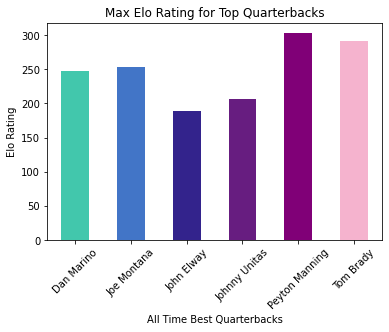

In [10]:
qb_max_df.plot(kind='bar', rot=45, xlabel='All Time Best Quarterbacks', ylabel='Elo Rating', title='Max Elo Rating for Top Quarterbacks', color=colors)

### Observations
- Surprisingly, Peyton Manning has highest average and maximum Elo Rating
- Tom Brady is a close second (these two are much higher than the rest)
- Next steps: look at any discrepancies between home and away

# Question 2
How does Tom Brady's home vs away performance compare to other top rated Quarterbacks?

## Process
1. Use date time index
2. Use relevant columns: qb1, qb2, qb1_post_value, qb2_post_value
3. Isolate to only the 6 selected quarterbacks
4. Replace NaN values with None
5. Convert numbers to floats
6. Group data by Quarterback and location 
7. Plot in bar graph

In [11]:

home_away_df = pd.read_csv('../data/nfl_elo.csv')



home_away_df['date_dt']=pd.to_datetime(home_away_df['date'])
home_away_df=home_away_df.set_index('date_dt')

cols_to_use = ['qb1', 'qb2', 'qb1_value_post', 'qb2_value_post']
home_away_df = home_away_df[cols_to_use]

home_away_df




,qb1,qb2,qb1_value_post,qb2_value_post
date_dt,,,,
1920-09-26,NaN,NaN,NaN,NaN
1920-10-03,NaN,NaN,NaN,NaN
1920-10-03,NaN,NaN,NaN,NaN
1920-10-03,NaN,NaN,NaN,NaN
1920-10-03,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-01-17,NaN,NaN,NaN,NaN
2021-01-17,NaN,NaN,NaN,NaN
2021-01-24,NaN,NaN,NaN,NaN


In [12]:
best_filter = (home_away_df['qb1'] == 'Tom Brady') | (home_away_df['qb1'] == 'Peyton Manning') | (home_away_df['qb1'] == 'Joe Montana') | (home_away_df['qb1'] == 'Johnny Unitas') | (home_away_df['qb1'] == 'Dan Marino') | (home_away_df['qb1'] == 'John Elway' ) | (home_away_df['qb2'] == 'Tom Brady') | (home_away_df['qb2'] == 'Peyton Manning') | (home_away_df['qb2'] == 'Joe Montana') | (home_away_df['qb2'] == 'Johnny Unitas') | (home_away_df['qb2'] == 'Dan Marino') | (home_away_df['qb2'] == 'John Elway' )

In [13]:
home_away_df = home_away_df[best_filter]
home_away_df

,qb1,qb2,qb1_value_post,qb2_value_post
date_dt,,,,
1956-10-28,Johnny Unitas,Tobin Rote,11.114997,133.008945
1956-11-11,Babe Parilli,Johnny Unitas,6.501064,15.543547
1956-11-18,Bobby Layne,Johnny Unitas,75.967343,35.288468
1956-11-25,Johnny Unitas,Billy Wade,66.881897,22.377823
1956-12-02,Johnny Unitas,Y.A. Tittle,65.593531,85.001448
...,...,...,...,...
2020-11-29,Tom Brady,Patrick Mahomes,NaN,NaN
2020-12-13,Tom Brady,Kirk Cousins,NaN,NaN
2020-12-20,Matt Ryan,Tom Brady,NaN,NaN


In [14]:
home_away_df['brady_home_value'] = np.where(home_away_df['qb1'] == 'Tom Brady',home_away_df['qb1_value_post'], None)
home_away_df['brady_away_value'] = np.where(home_away_df['qb2'] == 'Tom Brady',home_away_df['qb2_value_post'], None)

home_away_df['manning_home_value'] = np.where(home_away_df['qb1'] == 'Peyton Manning',home_away_df['qb1_value_post'], None)
home_away_df['manning_away_value'] = np.where(home_away_df['qb2'] == 'Peyton Manning',home_away_df['qb2_value_post'], None)

home_away_df['montana_home_value'] = np.where(home_away_df['qb1'] == 'Joe Montana',home_away_df['qb1_value_post'], None)
home_away_df['montana_away_value'] = np.where(home_away_df['qb2'] == 'Joe Montana',home_away_df['qb2_value_post'], None)

home_away_df['unitas_home_value'] = np.where(home_away_df['qb1'] == 'Johnny Unitas',home_away_df['qb1_value_post'], None)
home_away_df['unitas_away_value'] = np.where(home_away_df['qb2'] == 'Johnny Unitas',home_away_df['qb2_value_post'], None)

home_away_df['marino_home_value'] = np.where(home_away_df['qb1'] == 'Dan Marino',home_away_df['qb1_value_post'], None)
home_away_df['marino_away_value'] = np.where(home_away_df['qb2'] == 'Dan Marino',home_away_df['qb2_value_post'], None)

home_away_df['elway_home_value'] = np.where(home_away_df['qb1'] == 'John Elway',home_away_df['qb1_value_post'], None)
home_away_df['elway_away_value'] = np.where(home_away_df['qb2'] == 'John Elway',home_away_df['qb2_value_post'], None)



In [15]:
home_away_df['brady_home_value']=home_away_df['brady_home_value'].astype(float)
home_away_df['brady_away_value']=home_away_df['brady_away_value'].astype(float)

home_away_df['manning_home_value']=home_away_df['manning_home_value'].astype(float)
home_away_df['manning_away_value']=home_away_df['manning_away_value'].astype(float)

home_away_df['montana_home_value']=home_away_df['montana_home_value'].astype(float)
home_away_df['montana_away_value']=home_away_df['montana_away_value'].astype(float)

home_away_df['unitas_home_value']=home_away_df['unitas_home_value'].astype(float)
home_away_df['unitas_away_value']=home_away_df['unitas_away_value'].astype(float)

home_away_df['marino_home_value']=home_away_df['marino_home_value'].astype(float)
home_away_df['marino_away_value']=home_away_df['marino_away_value'].astype(float)

home_away_df['elway_home_value']=home_away_df['elway_home_value'].astype(float)
home_away_df['elway_away_value']=home_away_df['elway_away_value'].astype(float)

In [16]:
cols_to_use = ['brady_home_value', 'brady_away_value', 'manning_home_value', 'manning_away_value', 'montana_home_value', 'montana_away_value', 'unitas_home_value', 'unitas_away_value', 'marino_home_value', 'marino_away_value', 'elway_home_value', 'elway_away_value']

best_home_away_df = home_away_df.resample('12M')[cols_to_use].mean()
best_home_away_df

,brady_home_value,brady_away_value,manning_home_value,manning_away_value,montana_home_value,montana_away_value,unitas_home_value,unitas_away_value,marino_home_value,marino_away_value,elway_home_value,elway_away_value
date_dt,,,,,,,,,,,,
1956-10-31,NaN,NaN,NaN,NaN,NaN,NaN,11.114997,NaN,NaN,NaN,NaN,NaN
1957-10-31,NaN,NaN,NaN,NaN,NaN,NaN,82.337540,62.406706,NaN,NaN,NaN,NaN
1958-10-31,NaN,NaN,NaN,NaN,NaN,NaN,125.188254,128.989581,NaN,NaN,NaN,NaN
1959-10-31,NaN,NaN,NaN,NaN,NaN,NaN,148.860139,150.000221,NaN,NaN,NaN,NaN
1960-10-31,NaN,NaN,NaN,NaN,NaN,NaN,174.964105,174.214035,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-31,244.634623,246.267625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-31,228.319809,237.191059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-31,224.528308,222.922699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
best_mean_df = best_home_away_df.mean().to_frame()
best_mean_df = best_mean_df.reset_index()
best_mean_df.columns = ['label', 'value']
best_mean_df

,label,value
0,brady_home_value,185.751321
1,brady_away_value,186.037882
2,manning_home_value,195.920359
3,manning_away_value,197.068940
4,montana_home_value,147.789671
5,montana_away_value,144.881321
6,unitas_home_value,117.862238
7,unitas_away_value,119.882232
8,marino_home_value,140.518042
9,marino_away_value,137.746485


In [18]:
best_mean_df[['qb','location']]=best_mean_df['label'].apply(lambda v: pd.Series(v.split('_')[0:2]))
best_mean_df['qb']=best_mean_df['qb'].str.title()

<AxesSubplot:title={'center':'Home vs. Away Elo Rating for Top Quarterbacks'}, xlabel='All Time Best Quarterbacks', ylabel='Elo Rating'>

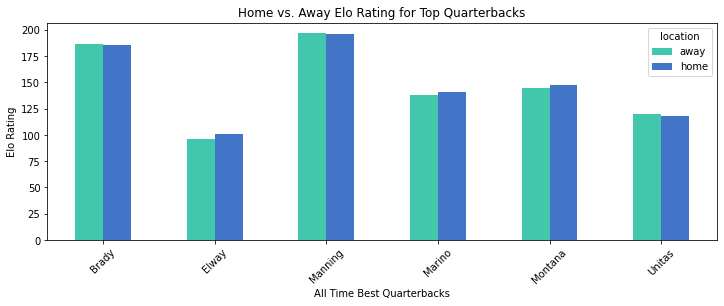

In [19]:
best_mean_grouped=best_mean_df.groupby(['qb','location'])['value'].sum().unstack()

best_mean_grouped.plot(kind='bar', rot=45, 
                       figsize=(12, 4), 
                       xlabel='All Time Best Quarterbacks', 
                       ylabel='Elo Rating', 
                       title='Home vs. Away Elo Rating for Top Quarterbacks', 
                       color=colors)

### Observations
- Peyton Manning has highest overall
- Only 3 quarterbacks have a higher average away game Elo value  than home game: Brady, Manning, Unitas
    - Shows it is a more unique trend
- Brady and Manning are much more elite than other  QBs
- Everyone's home vs away is pretty close